In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Call pandas read csv to read data from the CSV.
df = pd.read_csv('survey_results_public.csv')

In [2]:
# Show a snippet of the unprocessed CSV.
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
# Remove all columns other than Country, EdLevel, Employment, ConvertedCompYearly.
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
# Change column name to Salary then check results.
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [4]:
# Remove row entries where values from Salary are null.
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [5]:
# Check type and number of values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [6]:
# Only keep full-time employment row entries, then delete the employment column.
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40627 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40627 non-null  object 
 1   EdLevel       40608 non-null  object 
 2   YearsCodePro  40228 non-null  object 
 3   Salary        40627 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [7]:
# Drop all row entries that contain any null values.
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [8]:
# Check to ensure a delta in overall count after removing null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [9]:
# Find the number of entries per country so that the countries without enough data can be removed.
df['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [10]:
# Creates a minimun cutoff, so that anything below minimum is moved to "Other" group.
def clean_countries(countries, minimum):
    country = {}
    for i in range(len(countries)):
        if countries.values[i] >= minimum:
            country[countries.index[i]] = countries.index[i]
        else:
            country[countries.index[i]] = 'Other'
    return country

In [11]:
# Call the above method to only keep the countries with entries above 500, and move the countries below 300 to "Other".
country_mapping = clean_countries(df.Country.value_counts(), 500)
df['Country'] = df['Country'].map(country_mapping)
df.Country.value_counts()

Other                                                   12448
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Name: Country, dtype: int64

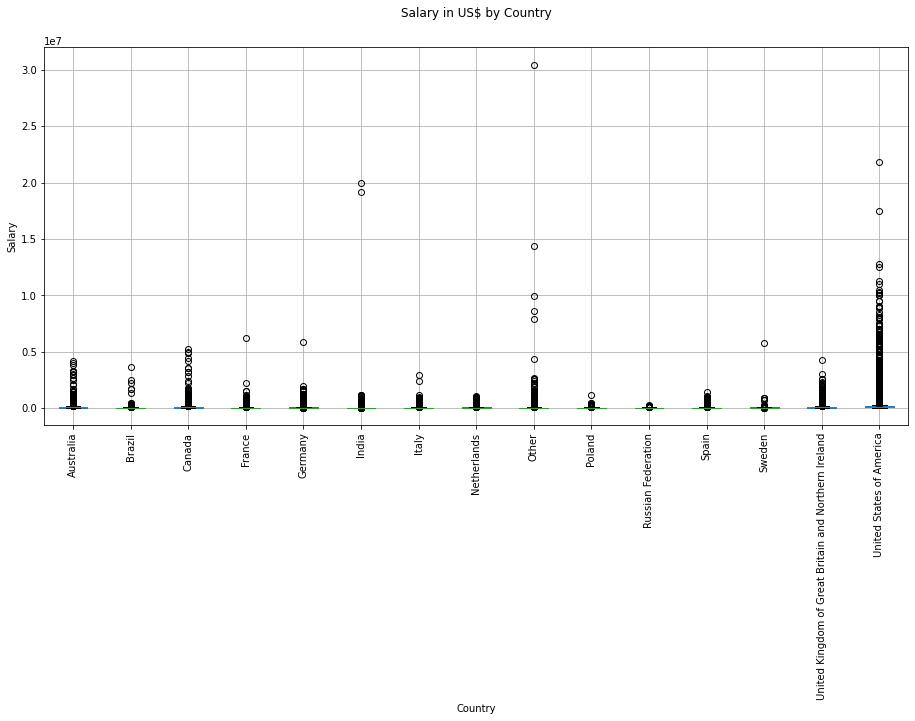

In [12]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [13]:
df.shape

(40211, 4)

In [14]:
df.describe()

,Salary
count,4.021100e+04
mean,1.215537e+05
std,4.997584e+05
min,1.000000e+00
25%,2.853600e+04
50%,5.816700e+04
75%,1.000000e+05
max,3.046852e+07


In [15]:
# Remove "other" category because data is too volatile.
df = df[df['Country'] != 'Other']

In [16]:
# Find unique entries concerning years of professional experience.
df['YearsCodePro'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '12', '8', '17', '1', '14', '7', '34', '11', '25', '24',
       '22', '13', '9', '26', '39', '20', '27', '23', '35', '30', '19',
       '33', '37', '43', '40', '29', '38', '31', '45', '42', '28', '46',
       '32', '36', '47', '44', '41', 'More than 50 years', '50', '49',
       '48'], dtype=object)

In [17]:
# Method to change "More than 50 years" & "Less than 1 year" to 50 to represent 50 or above and 0.5 to represent less than 1 year.
def clean_work_experience(e):
    if e == 'More than 50 years':
        return 50
    if e == 'Less than 1 year':
        return 0.5
    return float(e)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_work_experience)

In [18]:
# Check that experience entries have been altered.
df['YearsCodePro'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
       12. ,  8. , 17. ,  1. , 14. ,  7. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. , 26. , 39. , 20. , 27. , 23. , 35. , 30. , 19. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 45. , 42. , 28. , 46. , 32. ,
       36. , 47. , 44. , 41. , 50. , 49. , 48. ])

In [19]:
# Creates a maximum cutoff for years of experience.
df = df[df['YearsCodePro'] < 11]

In [20]:
df['YearsCodePro'].unique()

array([ 4. ,  5. ,  6. ,  2. , 10. ,  0.5,  3. ,  8. ,  1. ,  7. ,  9. ])

In [21]:
# Find unique education entries.
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Something else',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [22]:
# Method that further sorts the education level into 4 primary categories.
def clean_education_level(x):
    if 'Bachelor' in x:
        return "Bachelor's Degree"
    if 'Master' in x:
        return "Master's Degree"
    if 'Other doctoral' in x or 'Professional degree' in x:
        return "Post Graduate Degree"
    else:
        return "Less than Bachelor's Degree"

df['EdLevel'] = df['EdLevel'].apply(clean_education_level)

In [23]:
# Check changes.
df['EdLevel'].unique()

array(["Master's Degree", "Bachelor's Degree", 'Post Graduate Degree',
       "Less than Bachelor's Degree"], dtype=object)

In [24]:
# Create a min and max salary range to remove outliers.
df = df[df['Salary'] >= 500]
df = df[df['Salary'] <= 200000]

In [25]:
# Cleaning the entire dataset did not yield results needed. Split data by country into new .csv files.
for (Country), group in df.groupby(['Country']):
    group.to_csv(f'{Country}.csv', index = False)

In [26]:
# Read country csv and assign to new dataframe.
df_Australia = pd.read_csv('Australia.csv')
df_Australia = df_Australia[df_Australia['Salary'] <= 500000]

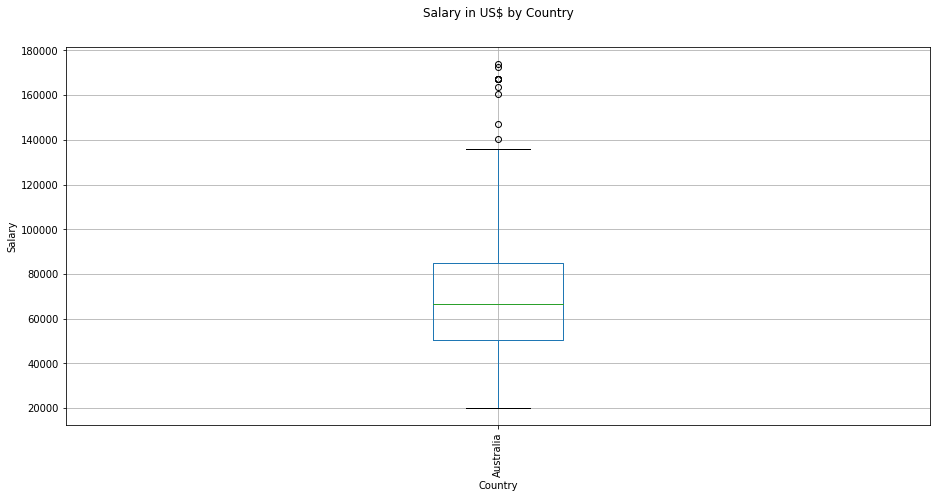

In [27]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Australia.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [28]:
df_Australia.shape

(440, 4)

In [29]:
# Interquartile range to remove outliers.
Q1 = df_Australia.quantile(0.25)
Q3 = df_Australia.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Australia = df_Australia[~((df_Australia < (Q1 - 1.5 * IQR)) | (df_Australia > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/4027253572.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Australia = df_Australia[~((df_Australia < (Q1 - 1.5 * IQR)) | (df_Australia > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [30]:
# Check to see if outliers are removed.
df_Australia.shape

(429, 4)

In [31]:
# Read country csv and assign to new dataframe.
df_Brazil = pd.read_csv('Brazil.csv')
df_Brazil = df_Brazil[df_Brazil['Salary'] <= 500000]

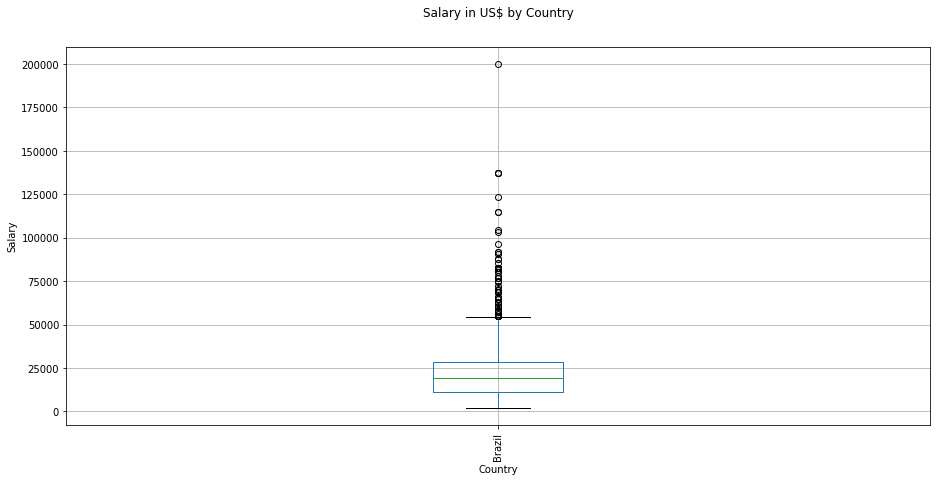

In [32]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Brazil.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [33]:
df_Brazil.shape

(963, 4)

In [34]:
# Interquartile range to remove outliers.
Q1 = df_Brazil.quantile(0.25)
Q3 = df_Brazil.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Brazil = df_Brazil[~((df_Brazil < (Q1 - 1.5 * IQR)) | (df_Brazil > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/3084006633.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Brazil = df_Brazil[~((df_Brazil < (Q1 - 1.5 * IQR)) | (df_Brazil > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [35]:
# Check to see if outliers are removed.
df_Brazil.shape

(900, 4)

In [36]:
# Read country csv and assign to new dataframe.
df_Canada = pd.read_csv('Canada.csv')
df_Canada = df_Canada[df_Canada['Salary'] <= 500000]

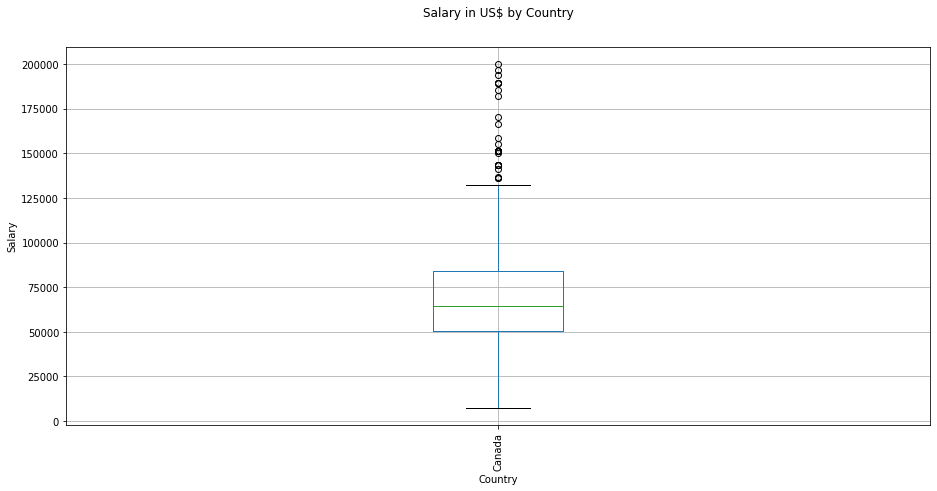

In [37]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Canada.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [38]:
df_Canada.shape

(1001, 4)

In [39]:
# Interquartile range to remove outliers.
Q1 = df_Canada.quantile(0.25)
Q3 = df_Canada.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Canada = df_Canada[~((df_Canada < (Q1 - 1.5 * IQR)) | (df_Canada > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/2318346424.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Canada = df_Canada[~((df_Canada < (Q1 - 1.5 * IQR)) | (df_Canada > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [40]:
# Check.
df_Canada.shape

(969, 4)

In [41]:
# Read country csv and assign to new dataframe.
df_France = pd.read_csv('France.csv')
df_France = df_France[df_France['Salary'] <= 500000]

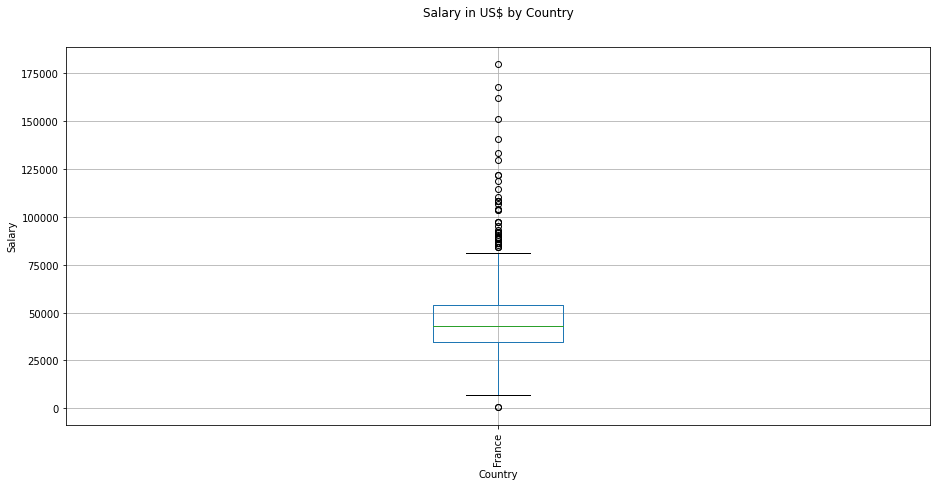

In [42]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_France.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [43]:
df_France.shape

(945, 4)

In [44]:
# Interquartile range to remove outliers.
Q1 = df_France.quantile(0.25)
Q3 = df_France.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_France = df_France[~((df_France < (Q1 - 1.5 * IQR)) | (df_France > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/1873339634.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_France = df_France[~((df_France < (Q1 - 1.5 * IQR)) | (df_France > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [45]:
# Check.
df_France.shape

(897, 4)

In [46]:
# Read country csv and assign to new dataframe.
df_Germany = pd.read_csv('Germany.csv')
df_Germany = df_Germany[df_Germany['Salary'] <= 500000]

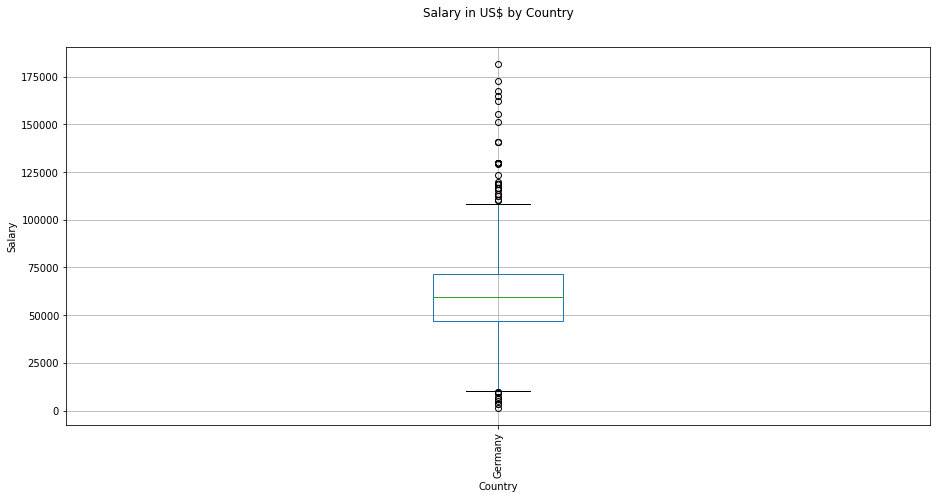

In [47]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Germany.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [48]:
df_Germany.shape

(1786, 4)

In [49]:
# Interquartile range to remove outliers.
Q1 = df_Germany.quantile(0.25)
Q3 = df_Germany.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Germany = df_Germany[~((df_Germany < (Q1 - 1.5 * IQR)) | (df_Germany > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/675246503.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Germany = df_Germany[~((df_Germany < (Q1 - 1.5 * IQR)) | (df_Germany > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [50]:
# Check.
df_Germany.shape

(1736, 4)

In [51]:
# Read country csv and assign to new dataframe.
df_India = pd.read_csv('India.csv')
df_India = df_India[df_India['Salary'] <= 500000]

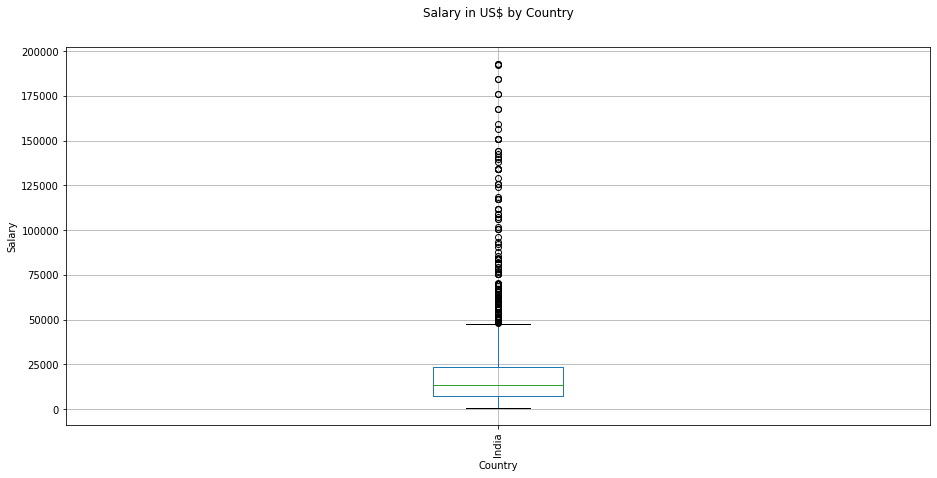

In [52]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_India.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [53]:
df_India.shape

(3005, 4)

In [54]:
# Interquartile range to remove outliers.
Q1 = df_India.quantile(0.25)
Q3 = df_India.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_India = df_India[~((df_India < (Q1 - 1.5 * IQR)) | (df_India > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/2053874570.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_India = df_India[~((df_India < (Q1 - 1.5 * IQR)) | (df_India > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [55]:
# Check.
df_India.shape

(2806, 4)

In [56]:
# Read country csv and assign to new dataframe.
df_Italy = pd.read_csv('Italy.csv')
df_Italy = df_Italy[df_Italy['Salary'] <= 500000]

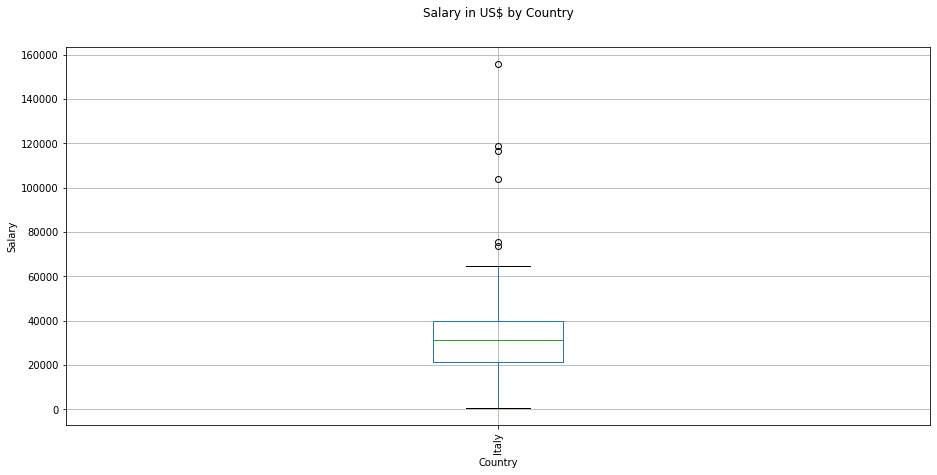

In [57]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Italy.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [58]:
df_Italy.shape

(446, 4)

In [59]:
# Interquartile range to remove outliers.
Q1 = df_Italy.quantile(0.25)
Q3 = df_Italy.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Italy = df_Italy[~((df_Italy < (Q1 - 1.5 * IQR)) | (df_Italy > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/2364829045.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Italy = df_Italy[~((df_Italy < (Q1 - 1.5 * IQR)) | (df_Italy > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [60]:
# Check.
df_Italy.shape

(440, 4)

In [61]:
# Read country csv and assign to new dataframe.
df_Netherlands = pd.read_csv('Netherlands.csv')
df_Netherlands = df_Netherlands[df_Netherlands['Salary'] <= 500000]

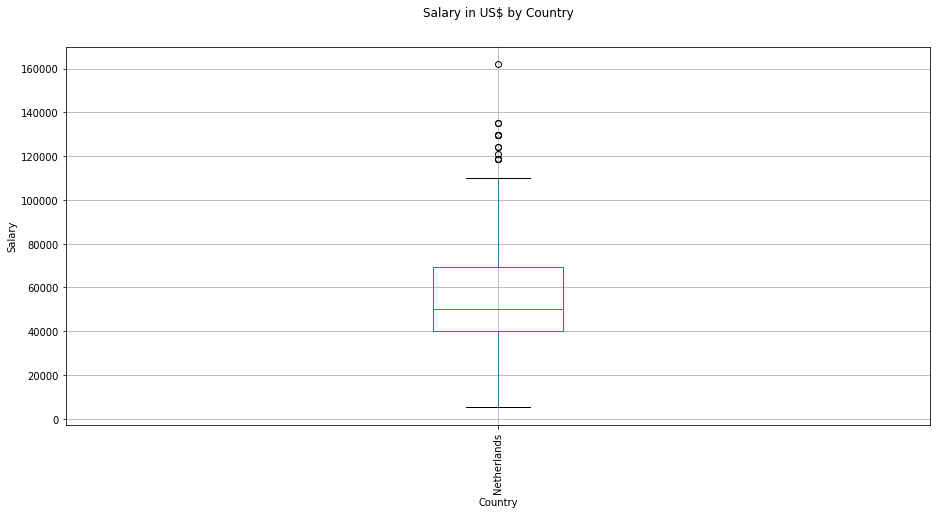

In [62]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Netherlands.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [63]:
df_Netherlands.shape

(529, 4)

In [64]:
# Interquartile range to remove outliers.
Q1 = df_Netherlands.quantile(0.25)
Q3 = df_Netherlands.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Netherlands = df_Netherlands[~((df_Netherlands < (Q1 - 1.5 * IQR)) | (df_Netherlands > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/4192187504.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Netherlands = df_Netherlands[~((df_Netherlands < (Q1 - 1.5 * IQR)) | (df_Netherlands > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [65]:
# Check.
df_Netherlands.shape

(516, 4)

In [66]:
# Read country csv and assign to new dataframe.
df_Poland = pd.read_csv('Poland.csv')
df_Poland = df_Poland[df_Poland['Salary'] <= 500000]

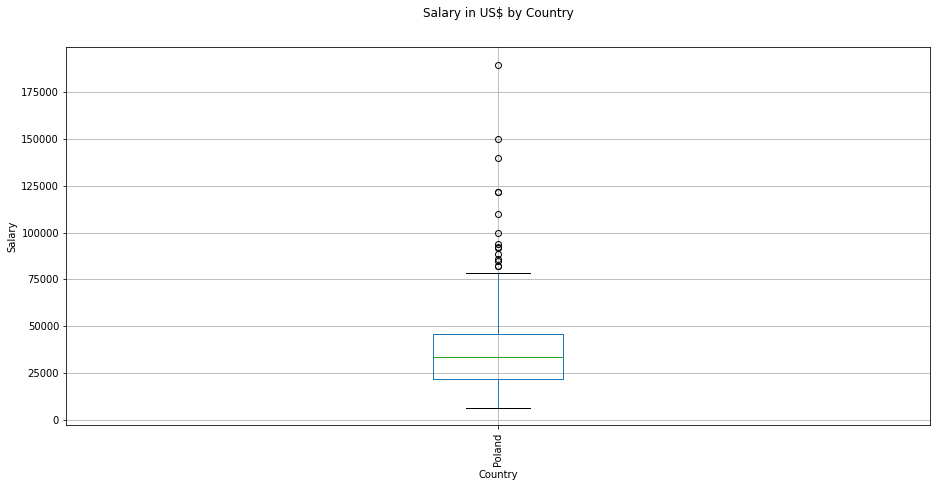

In [67]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Poland.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [68]:
df_Poland.shape

(625, 4)

In [69]:
# Interquartile range to remove outliers.
Q1 = df_Poland.quantile(0.25)
Q3 = df_Poland.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Poland = df_Poland[~((df_Poland < (Q1 - 1.5 * IQR)) | (df_Poland > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/3028036219.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Poland = df_Poland[~((df_Poland < (Q1 - 1.5 * IQR)) | (df_Poland > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [70]:
# Check.
df_Poland.shape

(610, 4)

In [71]:
# Read country csv and assign to new dataframe.
df_Russia = pd.read_csv('Russian Federation.csv')
df_Russia = df_Russia[df_Russia['Salary'] <= 500000]

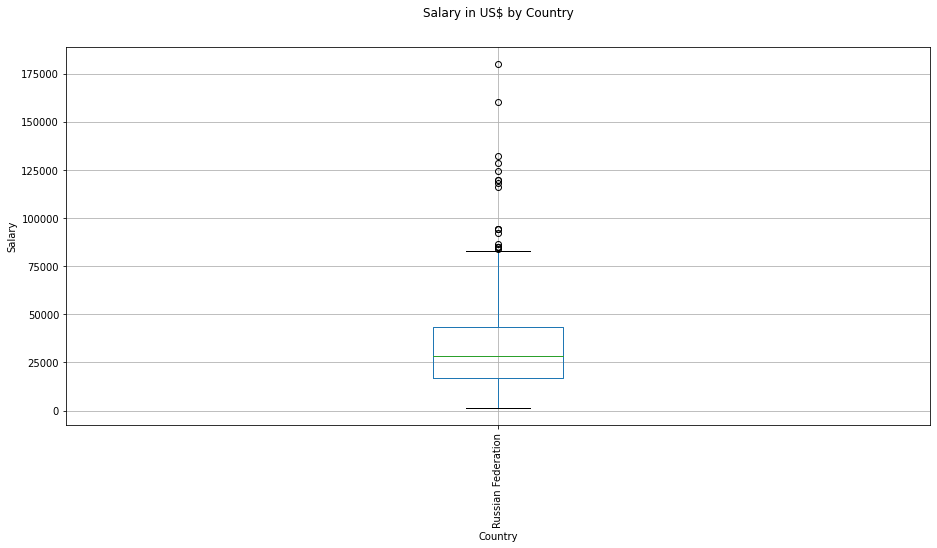

In [72]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Russia.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [73]:
df_Russia.shape

(537, 4)

In [74]:
# Interquartile range to remove outliers.
Q1 = df_Russia.quantile(0.25)
Q3 = df_Russia.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Russia = df_Russia[~((df_Russia < (Q1 - 1.5 * IQR)) | (df_Russia > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/4233684572.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Russia = df_Russia[~((df_Russia < (Q1 - 1.5 * IQR)) | (df_Russia > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [75]:
# Check.
df_Russia.shape

(518, 4)

In [76]:
# Read country csv and assign to new dataframe.
df_Spain = pd.read_csv('Spain.csv')
df_Spain = df_Spain[df_Spain['Salary'] <= 500000]

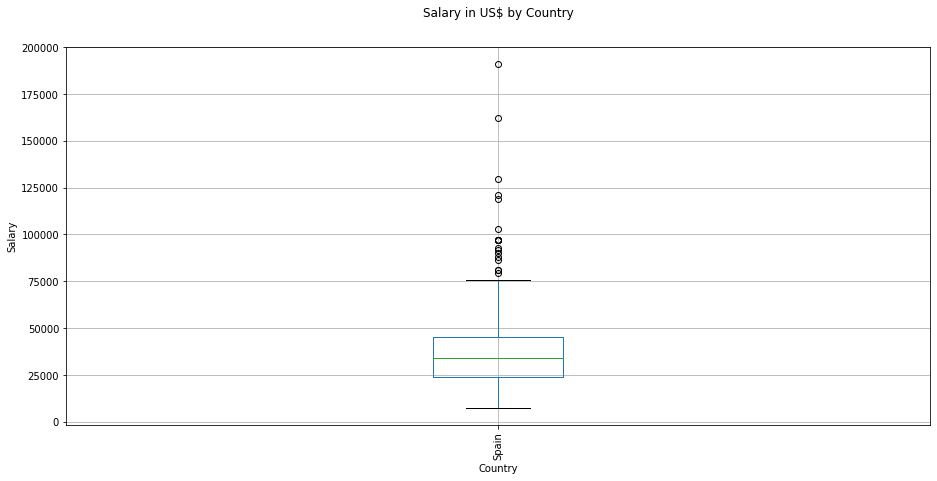

In [77]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Spain.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [78]:
df_Spain.shape

(536, 4)

In [79]:
# Interquartile range to remove outliers.
Q1 = df_Spain.quantile(0.25)
Q3 = df_Spain.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Spain = df_Spain[~((df_Spain < (Q1 - 1.5 * IQR)) | (df_Spain > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/3589039543.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Spain = df_Spain[~((df_Spain < (Q1 - 1.5 * IQR)) | (df_Spain > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [80]:
# Check.
df_Spain.shape

(517, 4)

In [81]:
# Read country csv and assign to new dataframe.
df_Sweden = pd.read_csv('Sweden.csv')
df_Sweden = df_Sweden[df_Sweden['Salary'] <= 500000]

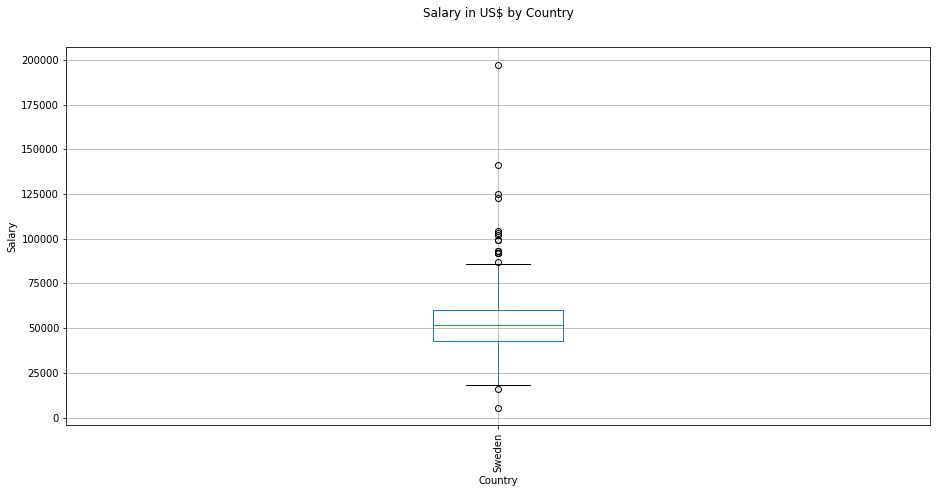

In [82]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_Sweden.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [83]:
df_Sweden.shape

(455, 4)

In [84]:
# Interquartile range to remove outliers.
Q1 = df_Sweden.quantile(0.25)
Q3 = df_Sweden.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_Sweden = df_Sweden[~((df_Sweden < (Q1 - 1.5 * IQR)) | (df_Sweden > (Q3 + 1.5 * IQR))).any(axis = 1)]

/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/307131686.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_Sweden = df_Sweden[~((df_Sweden < (Q1 - 1.5 * IQR)) | (df_Sweden > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [85]:
# Check.
df_Sweden.shape

(437, 4)

In [86]:
# Read country csv and assign to new dataframe.
df_UK = pd.read_csv('United Kingdom of Great Britain and Northern Ireland.csv')
df_UK = df_UK[df_UK['Salary'] <= 500000]

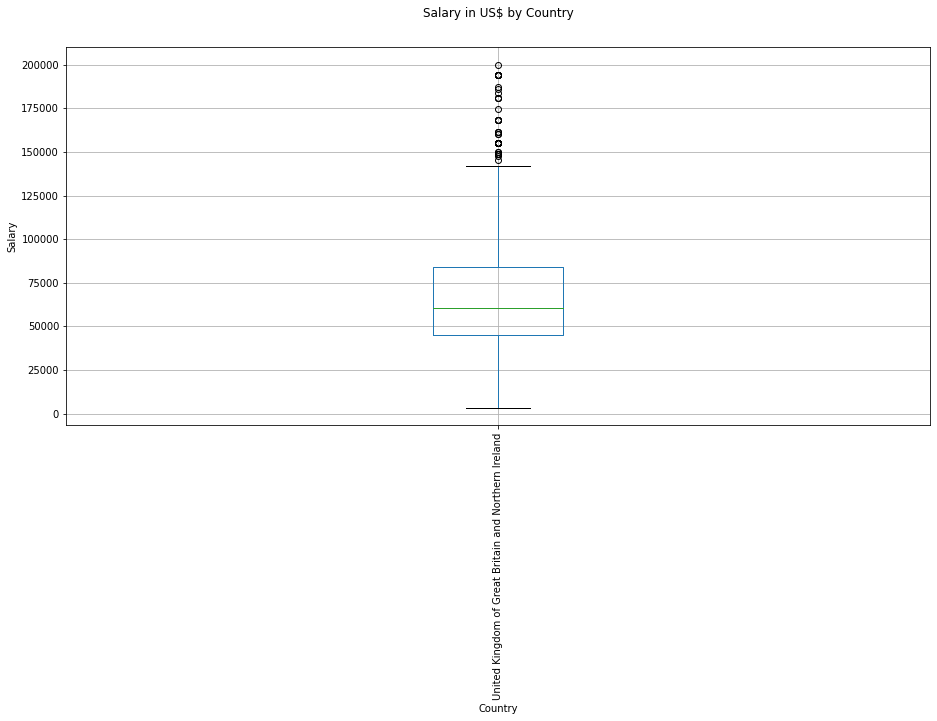

In [87]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_UK.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [88]:
df_UK.shape

(1484, 4)

In [89]:
# Interquartile range to remove outliers.
Q1 = df_UK.quantile(0.25)
Q3 = df_UK.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_UK = df_UK[~((df_UK < (Q1 - 1.5 * IQR)) | (df_UK > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/854327001.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_UK = df_UK[~((df_UK < (Q1 - 1.5 * IQR)) | (df_UK > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [90]:
# Check.
df_UK.shape

(1433, 4)

In [91]:
# Read country csv and assign to new dataframe.
df_US = pd.read_csv('United States of America.csv')
df_US = df_US[df_US['Salary'] <=500000 ]

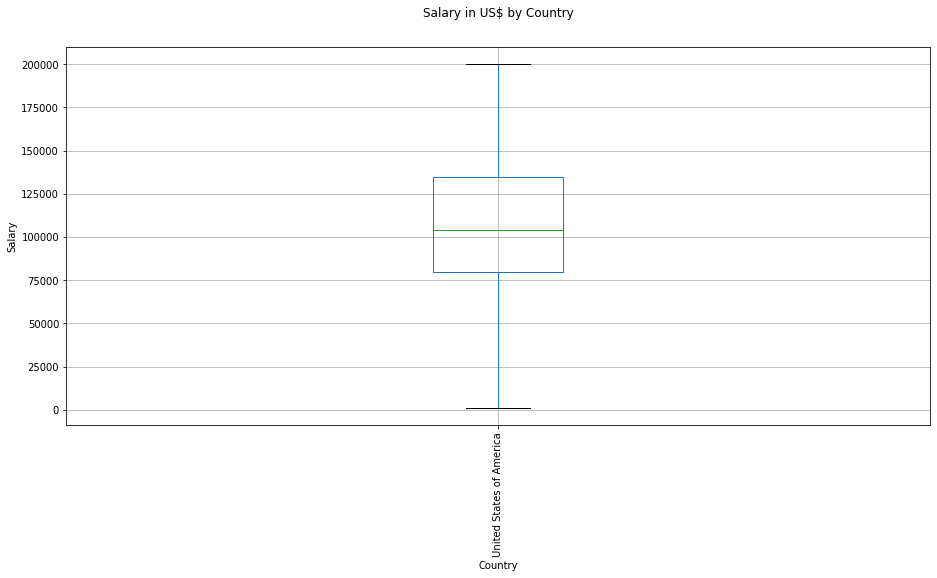

In [92]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1, 1, figsize = (15,7))
df_US.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary in US$ by Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [93]:
df_US.shape

(4936, 4)

In [94]:
# Interquartile range to remove outliers.
Q1 = df_US.quantile(0.25)
Q3 = df_US.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
 
# Print the outliers.
# print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove all outliers and show the number by using "shape" to compare to "shape" before this action.
df_US = df_US[~((df_US < (Q1 - 1.5 * IQR)) | (df_US > (Q3 + 1.5 * IQR))).any(axis = 1)]


/var/folders/rq/nn_4svg107d6nzx2v6dc9s9c0000gn/T/ipykernel_44414/863542544.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_US = df_US[~((df_US < (Q1 - 1.5 * IQR)) | (df_US > (Q3 + 1.5 * IQR))).any(axis = 1)]


In [95]:
# Check.
df_US.shape

(4936, 4)

In [96]:
# Now that all individual Country entries have been stripped of their respective outliers, the data from each will be recombined.
df_combined_after = pd.concat([df_Australia, df_Brazil, df_Canada, df_France, df_Germany, 
                            df_India, df_Italy, df_Netherlands, df_Poland, df_Russia, 
                            df_Spain, df_Sweden, df_UK, df_US], ignore_index = True)


df_combined_after.shape

(17144, 4)

In [97]:
# Entries representing as String values must be converted to numbers, so that they can be utilized by the system.
# Start with countries.
from sklearn.preprocessing import LabelEncoder
country_after_LE = LabelEncoder()
df_combined_after['Country'] = country_after_LE.fit_transform(df_combined_after['Country'])
df_combined_after['Country'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [98]:
# Convert String values of 'EdLevel' to numbers.
education_after_LE = LabelEncoder()
df_combined_after['EdLevel'] = education_after_LE.fit_transform(df_combined_after['EdLevel'])
df_combined_after['EdLevel'].unique()

array([2, 0, 1, 3])

In [99]:
# Check processing results.
df_combined_after.head()

,Country,EdLevel,YearsCodePro,Salary
0,0,2,2.0,96874.0
1,0,0,1.0,40086.0
2,0,1,0.5,60132.0
3,0,3,7.0,76831.0
4,0,0,5.0,86853.0


In [100]:
df_combined_after['YearsCodePro'].value_counts()

3.0     2360
2.0     2170
5.0     2157
4.0     2012
6.0     1640
10.0    1453
7.0     1317
8.0     1193
1.0     1106
0.5      988
9.0      748
Name: YearsCodePro, dtype: int64

In [101]:
df_combined_after['YearsCodePro'].unique()

array([ 2. ,  1. ,  0.5,  7. ,  5. ,  3. , 10. ,  6. ,  9. ,  4. ,  8. ])

In [102]:
# Change to altered dataframe to a new final dataframe.
df_final = df_combined_after
df_final.describe()

,Country,EdLevel,YearsCodePro,Salary
count,17144.000000,17144.000000,17144.000000,17144.000000
mean,7.795030,0.819412,4.766566,60596.324370
std,4.429131,0.959268,2.792570,43041.371542
min,0.000000,0.000000,0.500000,588.000000
25%,4.000000,0.000000,3.000000,27492.000000
50%,7.000000,0.000000,4.000000,51887.500000
75%,13.000000,2.000000,7.000000,84019.000000
max,13.000000,3.000000,10.000000,200000.000000


In [103]:
# Collect data from df_final and put into a csv file.
df_final.to_csv('Final_Data_After_Cleaning.csv')

In [104]:
#df_final = df_final[df_final['Salary'] >= 30000]
#df_final = df_final[df_final['Salary'] <= 200000]

In [105]:
# Import Training and Testing data model function.
from sklearn.model_selection import train_test_split

# The independent variables consists of country, education level, and years of experience. 
x = df_final.drop('Salary', axis = 1)
x.head()

,Country,EdLevel,YearsCodePro
0,0,2,2.0
1,0,0,1.0
2,0,1,0.5
3,0,3,7.0
4,0,0,5.0


In [106]:
# y is the dependent variable.
y = df_final['Salary']
y.head()

0    96874.0
1    40086.0
2    60132.0
3    76831.0
4    86853.0
Name: Salary, dtype: float64

In [107]:
x.shape, y.shape

((17144, 3), (17144,))

In [108]:
# The data will be split into 80% training and 20% testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 7, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13715, 3), (3429, 3), (13715,), (3429,))

In [109]:
# Data will first be tested with linear regression.
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [110]:
# Assign variable 'pred' with linear regression prediction on 'x_test'.
pred = linear_regression.predict(x_test)
pred

array([ 73225.25240424,  57182.77941603,  92503.84709717, ...,
       108620.96423185,  30512.66144585,  84445.28852984])

In [111]:
y_test

16685     70000.0
2636      75669.0
16439    129996.0
16770     85000.0
9866      29832.0
           ...   
9535      39636.0
16415    123000.0
12801    140000.0
6720       8376.0
14849    100000.0
Name: Salary, Length: 3429, dtype: float64

In [112]:
# Create variable 'difference' to show the difference in Salary between prediction and actual.
difference = y_test - pred
difference

16685    -3225.252404
2636     18486.220584
16439    37492.152903
16770      554.711470
9866    -30862.934000
             ...     
9535    -40437.911911
16415    14379.035768
12801    31379.035768
6720    -22136.661446
14849    15554.711470
Name: Salary, Length: 3429, dtype: float64

In [113]:
# Create table to get a better view of the delta.
import numpy as np
pd.DataFrame(np.c_[y_test, pred, difference], columns = ['Actual', 'Predicted', 'Difference'])

,Actual,Predicted,Difference
0,70000.0,73225.252404,-3225.252404
1,75669.0,57182.779416,18486.220584
2,129996.0,92503.847097,37492.152903
3,85000.0,84445.288530,554.711470
4,29832.0,60694.934000,-30862.934000
...,...,...,...
3424,39636.0,80073.911911,-40437.911911
3425,123000.0,108620.964232,14379.035768
3426,140000.0,108620.964232,31379.035768
3427,8376.0,30512.661446,-22136.661446


In [114]:
# Print the score of the linear regression model accuracy.
linear_regression.score(x_test, y_test)

0.3974288597943102

In [115]:
# Import decision tree regressor model to test on the data.
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 4)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=4)

In [116]:
# Use decision tree regressor to predict salary.
dtr_pred = dtr.predict(x_test)
dtr_pred

array([105491.17647059,  55820.17241379, 115042.92653061, ...,
       125637.40487805,   9479.33333333, 106888.45578231])

In [117]:
# Check the delta between actual and predicted.
dtr_difference = y_test - dtr_pred
dtr_difference

16685   -35491.176471
2636     19848.827586
16439    14953.073469
16770   -21888.455782
9866      1785.909091
             ...     
9535      -938.857143
16415    -2637.404878
12801    14362.595122
6720     -1103.333333
14849    -6888.455782
Name: Salary, Length: 3429, dtype: float64

In [118]:
# Create table to show the delta for decision tree predictions.
import numpy as np
pd.DataFrame(np.c_[y_test, dtr_pred, difference], columns = ['Actual', 'Predicted', 'Difference'])

,Actual,Predicted,Difference
0,70000.0,105491.176471,-3225.252404
1,75669.0,55820.172414,18486.220584
2,129996.0,115042.926531,37492.152903
3,85000.0,106888.455782,554.711470
4,29832.0,28046.090909,-30862.934000
...,...,...,...
3424,39636.0,40574.857143,-40437.911911
3425,123000.0,125637.404878,14379.035768
3426,140000.0,125637.404878,31379.035768
3427,8376.0,9479.333333,-22136.661446


In [119]:
# Print the accuracy score of the decision tree regressor.
dtr.score(x_test, y_test)

0.7162067800702243

In [120]:
# Import random forest regressor model to test on data.
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 4)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=4)

In [121]:
# Use the random forest regressor to predict salary.
rfr_pred = rfr.predict(x_test)
rfr_pred

array([105396.60021099,  55865.59916238, 115108.31704008, ...,
       125575.32848331,   9546.76536047, 106647.760298  ])

In [122]:
rfr_difference = y_test - rfr_pred
rfr_difference

16685   -35396.600211
2636     19803.400838
16439    14887.682960
16770   -21647.760298
9866      2125.640258
             ...     
9535      -188.364474
16415    -2575.328483
12801    14424.671517
6720     -1170.765360
14849    -6647.760298
Name: Salary, Length: 3429, dtype: float64

In [123]:
# Show to accuracy score of the random forest regressor.
rfr.score(x_test, y_test)

0.717146783869838

In [124]:
# Import polynomial regression model to test data.
from sklearn.preprocessing import PolynomialFeatures
lr_poly = LinearRegression()
poly_feat = PolynomialFeatures(degree = 12)
X = poly_feat.fit_transform(x_train)

In [125]:
X.shape

(13715, 455)

In [126]:
# Call linear regression function on polynomial data.
polynomial = LinearRegression()
polynomial.fit(X, y_train)


LinearRegression()

In [127]:
# Accuracy score of predicting salary with polynomial regression.
polynomial.score(X, y_train)

0.6611942528784339

In [128]:
# Import grid search and use the data with decision tree.
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12, 14, 16]
parameters = {'max_depth':max_depth}

regressor = DecisionTreeRegressor(random_state = 4)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=4),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16]},
             scoring='neg_mean_squared_error')

In [129]:
# Predict the salary and show the accuracy score.
regressor = gs.best_estimator_

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_train)
regressor.score(x_train, y_train)

0.7115115709199025

In [130]:
# Show contents of 'x' from splitting the dataset into training and testing data.
x

,Country,EdLevel,YearsCodePro
0,0,2,2.0
1,0,0,1.0
2,0,1,0.5
3,0,3,7.0
4,0,0,5.0
...,...,...,...
17139,13,0,2.0
17140,13,0,2.0
17141,13,0,10.0
17142,13,0,5.0


In [131]:
# Create array for 'x' that includes data points 'Country', 'EdLevel', and 'YearsCodePro'.
# Used as an example for how input data will be collected by the web app user and tested by the program.
x = np.array([["United States of America", "Master's Degree", 10]])
x

array([['United States of America', "Master's Degree", '10']],
      dtype='<U24')

In [132]:
# Apply label encoder to change to values to float for the program to use.
# Will be used again for the web app to transform user input.
x[:, 0] = country_after_LE.transform(x[:, 0])
x[:, 1] = education_after_LE.transform(x[:, 1])
x = x.astype(float)
x

array([[13.,  2., 10.]])

In [133]:
# Random forest has the most accurate salary predictions for the dataset.
# Use random forest to predict input 'x'.
rfr_pred = rfr.predict(x)
rfr_pred

/Users/dallasmerck/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([128852.20126301])

In [134]:
# Import pickle to convert to byte stream.
import pickle

In [135]:
# Using pickle, model can be saved in directory.
data = {"model": rfr, "country_after_LE": country_after_LE, "education_after_LE": education_after_LE}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [136]:
# Uses pickle to load the data from the model.
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
rfr_loaded = data["model"]
country_after_LE = data["country_after_LE"]
education_after_LE = data["education_after_LE"]

In [137]:
# Final prediction model for the web app.
rfr_pred = rfr_loaded.predict(x)
rfr_pred

/Users/dallasmerck/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([128852.20126301])